In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# cargamos los datos
data = pd.read_csv('Dataset_multivariable.csv')

# hacemos shuffle de los datos
data = data.sample(frac=1, random_state=0)

# dividimos los datos en entrenamiento 0.7 y test 0.2
train_data = data.iloc[:int(len(data)*0.7)]
test_data = data.iloc[int(len(data)*0.7):]

print('tr:', train_data)
print('ts:', test_data)

tr:     x1   x2    x3    x4    x5     y
2  1.0  0.8 -18.0  20.0  13.6  17.4
8  1.0  2.0 -36.0  44.0  23.8  34.8
4  1.0  1.2 -24.0  28.0  17.0  23.2
9  1.0  2.2 -39.0  48.0  25.5  37.7
1  1.0  0.6 -15.0  16.0  11.9  14.5
6  1.0  1.6 -30.0  36.0  20.4  29.0
7  1.0  1.8 -33.0  40.0  22.1  31.9
ts:     x1   x2    x3    x4    x5     y
3  1.0  1.0 -21.0  24.0  15.3  20.3
0  1.0  0.4 -12.0  12.0  10.2  11.6
5  1.0  1.4 -27.0  32.0  18.7  26.1


In [24]:
numero_variables = train_data.shape[1] - 1
w = np.zeros(numero_variables)
alpha = 0.00001
y = lambda x: np.dot(w, x)
y_pred = [] # predicciones
error = [] # errores
ws = [] # pesos

# entrenamiento
for i in range(5):
  # calculamos los pesos
  for column in range(numero_variables):
    w[column] = w[column] - 2*alpha * np.dot(w[column]*train_data.iloc[:, column] - train_data.iloc[:, numero_variables], train_data.iloc[:, column])
  ws.append(w.copy())
  # calculamos una predicción
  y_pred.append(y(test_data.iloc[:, :numero_variables].T.values))
  # calculamos el error
  error.append(np.mean(abs(y_pred[-1] - test_data.iloc[:, numero_variables])))

# pintamos los pesos
print(*ws, end='\n\n', sep='\n')

# pintamos las predicciones
print(*y_pred, end='\n\n', sep='\n')

# pintamos los errores
print(*error, end='\n\n', sep='\n')

[ 0.00377    0.0061364 -0.114666   0.137808   0.0777954]
[ 0.00753947  0.0122707  -0.21573032  0.25197917  0.15133254]
[ 0.01130842  0.01840291 -0.30480639  0.3465677   0.22084452]
[ 0.01507683  0.02453303 -0.38331625  0.42493241  0.28655164]
[ 0.01884472  0.03066105 -0.45251328  0.489856    0.34866218]

[6.91555402 3.82942564 8.97297294]
[12.91303493  7.1685536  16.74268915]
[18.12719148 10.08777275 23.48680396]
[22.67186914 12.64670074 29.35531474]
[26.64336005 14.89589475 34.47500358]

12.760682466666665
7.058574108131452
2.0994106025476973
2.2246282096720544
6.004752791223908



Ploteamos los resultados

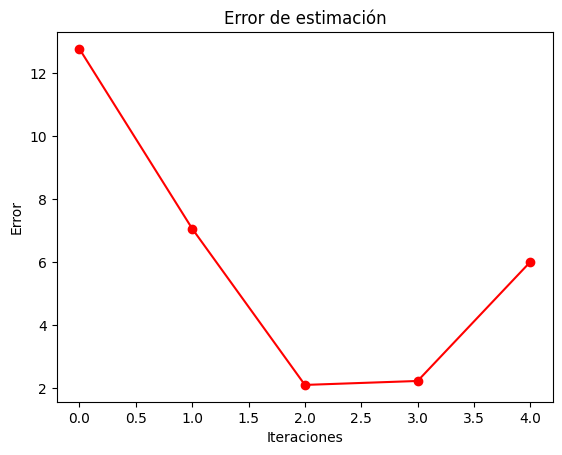

In [25]:
# graficamos el error de estimación
plt.plot(range(len(error)), error, 'o-', c='r')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Error de estimación')
plt.show()